# Time Series Analysis and Forecasting with Python

# How i analyzed data of Bellabeat to help guide marketing strategy for the company
## &nbsp;&nbsp;&nbsp;&nbsp; <span style='font-family:Georgia ; color : #006400'> It turns out that data can keep you healthy</span> 


## Introduction

<span style='font-family:Georgia;font-weight: normal'>  Welcome to the Bellabeat data analysis case study! In this case study,i will analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smartdevices. then i will select one Bellabeat product to apply these insights to. These questions will guide my analysis:
 > <font color= #006400 > 1. What are some trends in smart device usage? <br> 2. How could these trends apply to Bellabeat customers? <br> 3. How could these trends help influence Bellabeat marketing strategy? </font></span>

<span style='font-family:Georgia;font-weight: bold; color: #006400'> About the company : Bellabeat </span> <span style='font-family:Georgia ;font-weight: normal'> is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company </span>



## Prepare
<span style='font-family:Georgia;font-weight: normal'> The dataset used for this project is the FitBit Fitness Tracker Data. This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.
</span>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas.api.types import CategoricalDtype
import csv 
import seaborn as sns; 
import matplotlib.pyplot as plt # default library for making plots

In [3]:
# Importing the Datasets

dailyActivity = pd.read_csv("dailyActivity_merged.csv")
heartrate = pd.read_csv("heartrate_seconds_merged.csv")
sleepDay = pd.read_csv("sleepDay_merged.csv")

## <font color = green > Activity analysis </font>
### lets print some information about the dailyActivity DataFrame including the index dtype and columns, non-null values..

In [88]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

### As shown before, the Data Type of 'ActivityDate' column was object but after using to_datetime(), it got converted into a date time object.

In [105]:
dailyActivity['ActivityDate']= pd.to_datetime(dailyActivity['ActivityDate'])

In [106]:
#By default, it removes duplicate rows based on all columns.
dailyActivity = dailyActivity.drop_duplicates()
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### It is useful to see how the various data points correlate with each other. Plotting a correlation heat-map helps uncover some findings.

C:\Users\ELECTR~1\AppData\Local\Temp/ipykernel_17984/1757030096.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrmat, dtype=np.bool)


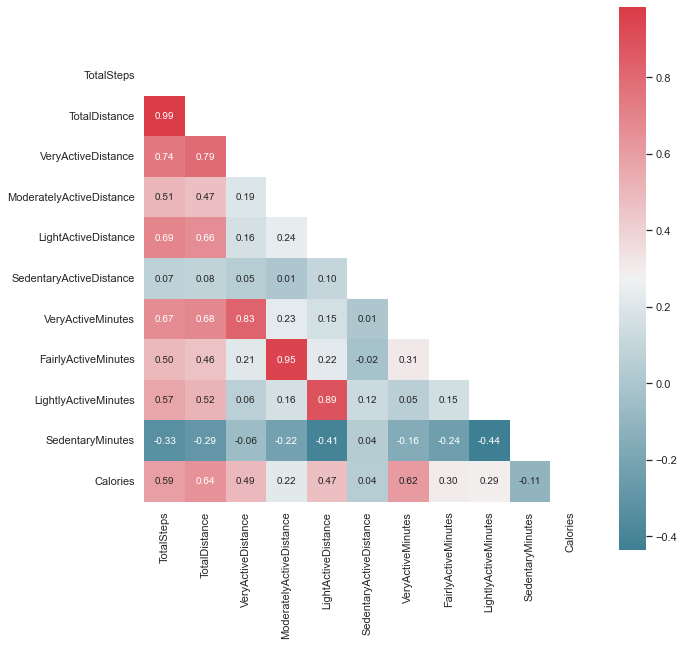

In [98]:
dailyActivity_heat = dailyActivity.drop(['ActivityDate', 'Id','LoggedActivitiesDistance','TrackerDistance'], axis = 1)


def plot_heatmap(corrmat, correlationOf, title, darkTheme=False):
    if darkTheme:
        sns.set(style='darkgrid', palette='deep') # Using Seaborn for making heatmap
        cmap="YlGnBu"
    else:     
        sns.set(style = "white")
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrmat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    plt.figure(figsize=(10, 10))
    hm = sns.heatmap(corrmat, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, cmap=cmap)
    hm.set_title(title)
    plt.yticks(rotation=0)
    plt.show()

correlationOf = 'Calories Burned'
corrdf_calories = dailyActivity_heat
plot_heatmap(corrdf_calories.corr(), correlationOf, '')

### The calories burned is strongly related to amount of steps, Dostance and active minutes. Minutes sedentary has a negative correlation with Weekdays which implies that the app's users spend more time slacking off.

In [107]:
dailyActivity['weekdays'] = dailyActivity['ActivityDate'].dt.day_name()


cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = CategoricalDtype(categories=cats, ordered=True)
dailyActivity['weekdays'] = dailyActivity['weekdays'].astype(cat_type)


dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weekdays
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [143]:
dailyActivity_test = dailyActivity.groupby('weekdays').mean()
dailyActivity_test

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
weekdays,,,,,,,,,,,,,,
Monday,4.859930e+09,7780.866667,5.552917,5.528750,0.224552,1.537333,0.585833,3.363083,0.002583,23.108333,14.000000,192.058333,1027.941667,2324.208333
Tuesday,4.851063e+09,8125.006579,5.832237,5.812829,0.169054,1.613289,0.593026,3.471053,0.001447,22.953947,14.335526,197.342105,1007.361842,2356.013158
Wednesday,4.815191e+09,7559.373333,5.488333,5.467600,0.139588,1.633467,0.527067,3.256333,0.001333,20.780000,13.100000,189.853333,989.480000,2302.620000
Thursday,4.837277e+09,7405.836735,5.312245,5.287415,0.129283,1.390476,0.505170,3.283129,0.002313,19.408163,11.959184,185.421769,961.993197,2199.571429
Friday,4.880997e+09,7448.230159,5.309921,5.302936,0.072186,1.312937,0.483810,3.489127,0.001825,20.055556,12.111111,204.198413,1000.309524,2331.785714
Saturday,4.908075e+09,8152.975806,5.854677,5.854677,0.000000,1.514597,0.677339,3.617177,0.001048,21.919355,15.201613,207.145161,964.282258,2354.967742
Sunday,4.847640e+09,6933.231405,5.027190,5.027190,0.000000,1.488926,0.618017,2.892314,0.000661,19.983471,14.528926,173.975207,990.256198,2263.000000


C:\Users\ELECTR~1\AppData\Local\Temp/ipykernel_17984/1223692531.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(minDayCodes)
C:\Users\ELECTR~1\AppData\Local\Temp/ipykernel_17984/1223692531.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(minDayCodes)


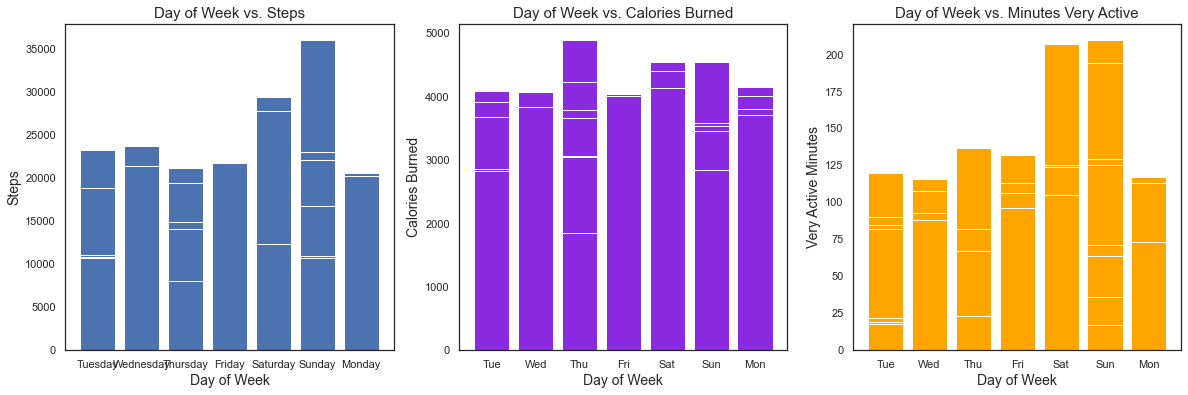

In [146]:
minDayCodes = ['Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon']


fig = plt.figure(figsize = (20,6))

ax = plt.subplot(131)  
plt.bar(dailyActivity['weekdays'], dailyActivity['TotalSteps'] )
plt.title('Day of Week vs. Steps', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Steps', fontsize=14)
#ax.set_xticklabels(minDayCodes)

#############

ax2 = fig.add_subplot(132)
plt.bar(dailyActivity['weekdays'], dailyActivity['Calories'], color='blueviolet')
plt.title('Day of Week vs. Calories Burned', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)
ax2.set_xticklabels(minDayCodes)

#############

ax3 = fig.add_subplot(133)
ax3.set_xticklabels(minDayCodes)
plt.bar(dailyActivity['weekdays'], dailyActivity['VeryActiveMinutes'], color='orange')
plt.title('Day of Week vs. Minutes Very Active', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Very Active Minutes', fontsize=14)
plt.show()



### Belabeat has a wide array of data points to measure daily activity levels. Steps, Calories...  are some of the standard measures. It also tracks how many minutes the users spend daily being moderately, slightly and very active. <br> It seems like Weekends are the great time for the app users to get outdoors and participate in active sports or hobbies.

# <font color = green > 24/7 heart rate monitoring </font>

###  as it features 24/7 heart rate monitoring, which tracks the users heart health over time, whether they are resting or exercising.
### Cleaning and some organization, Let’s explore what our heart rate DataFrame actually contains.

In [8]:
heartrate = pd.read_csv("heartrate_seconds_merged.csv")
heartrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [9]:
heartrate['Time'] =  pd.to_datetime(heartrate['Time'], format = '%m/%d/%Y %I:%M:%S %p')
heartrate = heartrate.drop(['Id'], axis = 1)
heartrate.set_index('Time', inplace=True)

# resample data by hour 
heartrate = heartrate['Value'].resample('1H').mean()
heartrate = heartrate.to_frame()

heartrate.head()

,Value
Time,
2016-04-12 00:00:00,63.576524
2016-04-12 01:00:00,62.193262
2016-04-12 02:00:00,60.573456
2016-04-12 03:00:00,60.274611
2016-04-12 04:00:00,59.480981


### I devided the data into Two schedule
> the wakeup timing range from 7:00 AM till 00:00.<br> the sleeping timing range from 00:00 till 07:00AM

In [10]:
# sleeping data
night = heartrate.between_time('00:00:00','07:00:00')
night = night['Value'].resample('1D').mean()
night = night.to_frame()
night = night.rename(columns={"Value": "night_heartrate"})

In [11]:
day = heartrate[~heartrate.index.isin(night.index)]
day = day['Value'].resample('1D').mean()
day = day.to_frame()
day = day.rename(columns={"Value": "day_heartrate"})

In [12]:
day_night = day.merge(night, left_index=True, right_index=True)
day_night['weekdays'] = day_night.index.day_name()
day_night.head()

,day_heartrate,night_heartrate,weekdays
Time,,,
2016-04-12,77.543855,64.834718,Tuesday
2016-04-13,74.023865,66.381392,Wednesday
2016-04-14,74.355916,67.500866,Thursday
2016-04-15,77.492078,67.038149,Friday
2016-04-16,78.397569,72.162403,Saturday


# Heart Rate between day and night

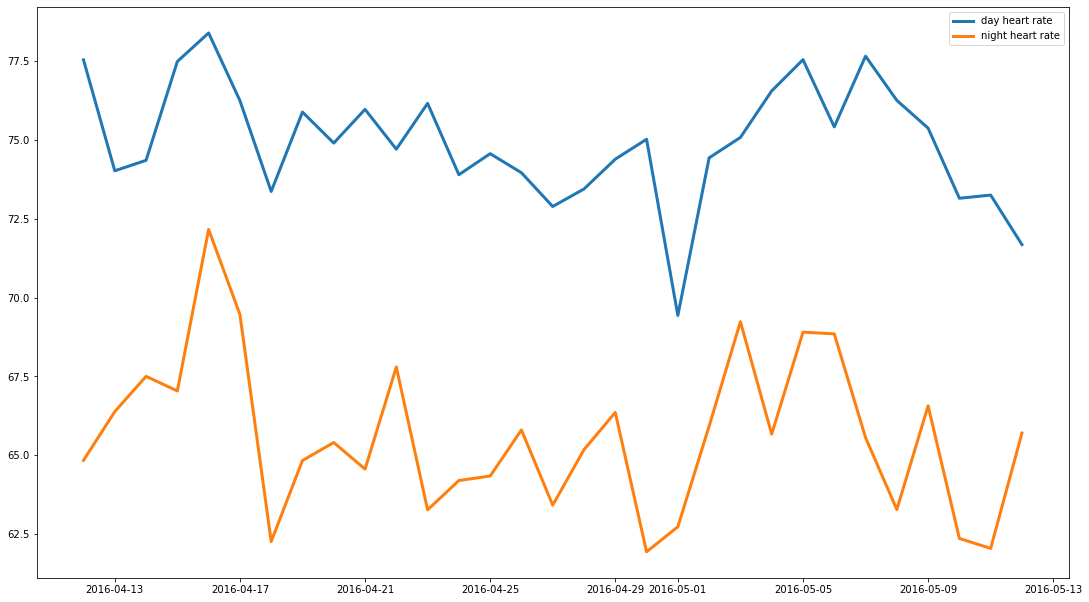

In [14]:
#import matplotlib.pylot as plt

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.figsize=(20, 10)
plt.plot(day.index, day['day_heartrate'], linewidth=3, label = 'day heart rate') # plot first line
plt.plot(night.index, night['night_heartrate'], linewidth=3, label = 'night heart rate') # plot second line
plt.legend()

plt.show()

### As the data shows us that  <span style='font-family:Georgia;font-weight: bold; color: #006400'> A slowerheart rate at night is quite normal </span> in most people <br>  so heart rate has a circadian variation, with a higher HR during daytime compared with night-time. That's because heart rate naturally fluctuates during the day, from about 60 to 100 beats per minute, depending on what you're doing. Still, activity trackers with heart rate monitors may motivate people to be more active, and achieve their heart rate goals

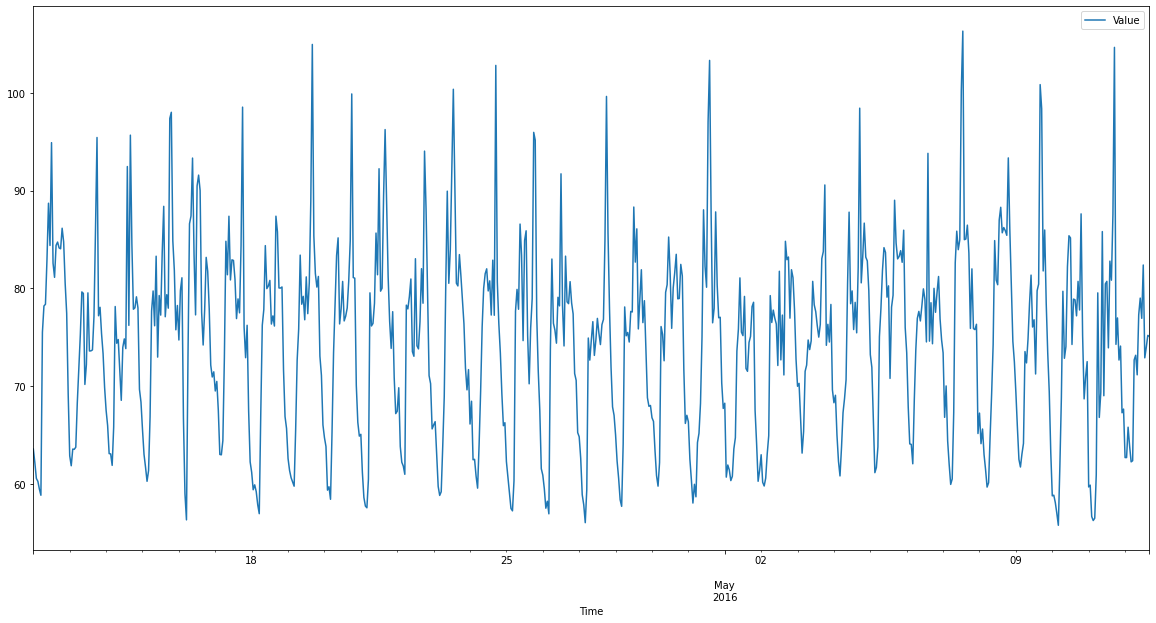

In [15]:
heartrate.plot(figsize=(20, 10))
plt.show()


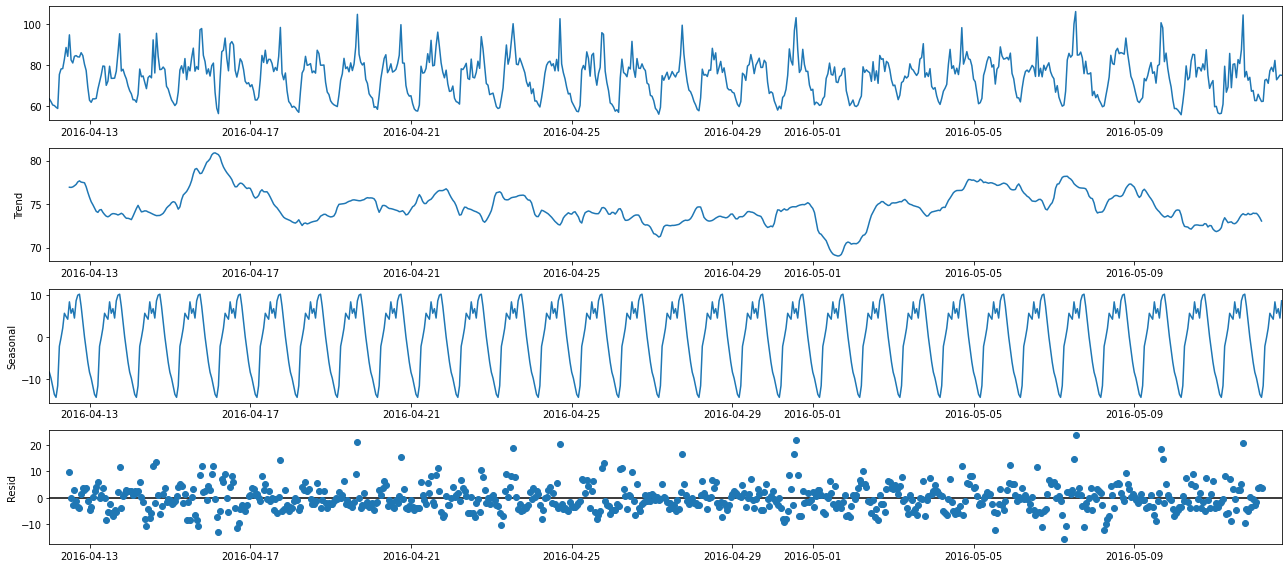

In [16]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(heartrate, model='additive')
fig = decomposition.plot()
plt.show()


In [17]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(heartrate,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8450.456501822162
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7742.757474971289
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6111.57243882062
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5219.079676071857
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6116.283063914003
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5328.884203654481
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4866.713410078207
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4852.548097822466
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7530.988866333652
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6884.2961640055255
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5612.9913177019325
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4832.131556567448
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5622.2288872193
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4930.805893247558
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4717.066545561496
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4652.368119931096
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4842.482438426789
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4762.5894484788805
ARIMA(0, 1

C:\Users\Electro Fatal\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:5227.75549939566
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:4584.143612067544
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:4772.034988968226
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:4671.3343353109485
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:4679.827145309791
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:4550.006225990635
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:4835.390038191331
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:4755.466083306281
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:5223.094988010318
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:4579.756435766243
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:4764.3344139512155
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:4666.947184765042
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:4681.824718424401
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:4544.969821527094
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:4835.051329619545
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:4755.546636934314
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:5277.756399866903
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4650.512544430688
ARIMA(1, 

In [19]:
mod = sm.tsa.statespace.SARIMAX(heartrate,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7028      0.018     39.277      0.000       0.668       0.738
ma.L1         -1.0000      6.413     -0.156      0.876     -13.569      11.569
ar.S.L12      -0.2978      0.042     -7.049      0.000      -0.381      -0.215
ma.S.L12      -0.8899      0.022    -40.419      0.000      -0.933      -0.847
sigma2        33.7469    216.701      0.156      0.876    -390.979     458.472


C:\Users\Electro Fatal\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


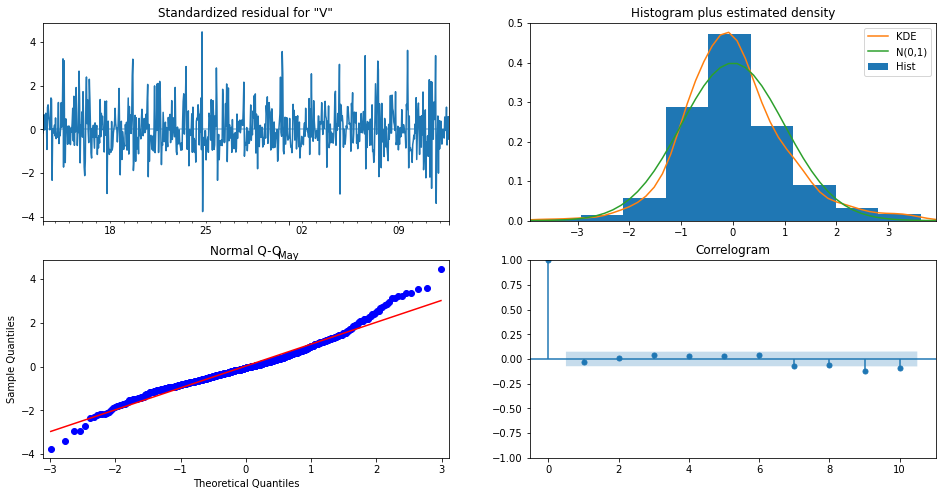

In [20]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

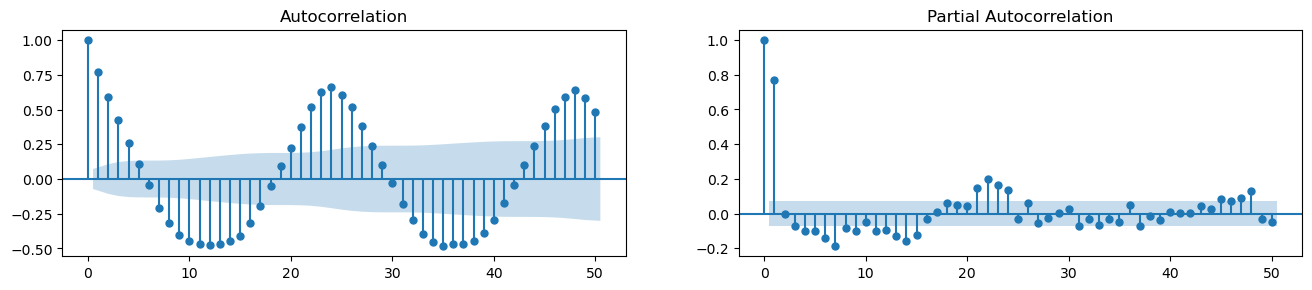

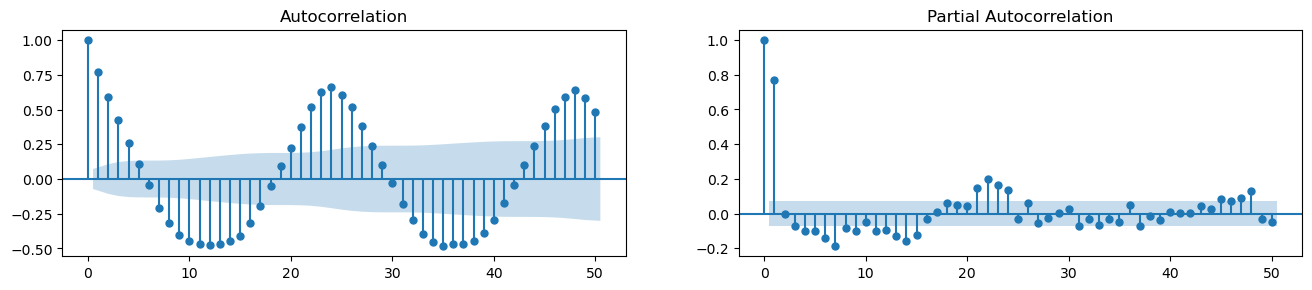

In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(heartrate['Value'].tolist(), lags=50, ax=axes[0])
plot_pacf(heartrate['Value'].tolist(), lags=50, ax=axes[1])

C:\Users\Electro Fatal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


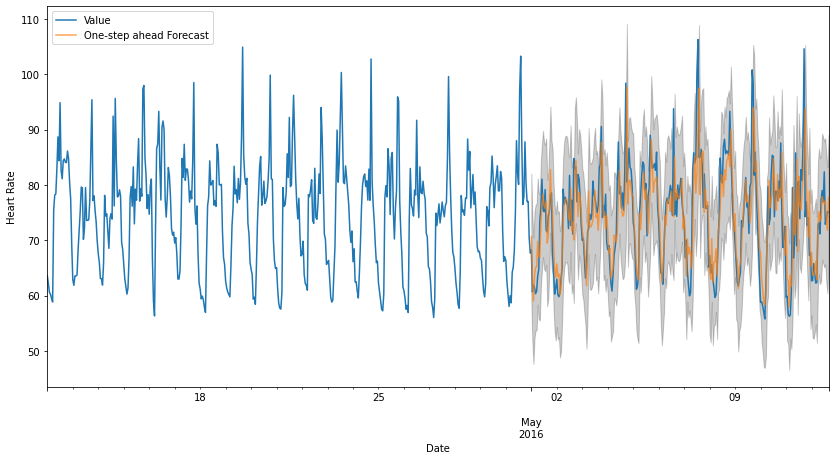

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2016-05-01 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = heartrate.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Heart Rate')
plt.legend()
plt.show()

In [122]:
y_forecasted  = pred.predicted_mean
y_truth = heartrate['2016-04-28 00:00:00':]
truth_value = y_truth['Value']
mse = ((y_forecasted - truth_value) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 33.39


# <font color = green> Sleep Analysis </font>

### Sleep plays an important role in your physical health, Ongoing sleep deficiency is linked to an increased risk of heart disease, kidney disease, high blood pressure ...<br>  We spend about a third of our life in sleeping, Hence, it becomes important to get the most out of our sleep.  

In [120]:
sleepDay = pd.read_csv("sleepDay_merged.csv")
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [122]:
sleepDay['SleepDay'] =  pd.to_datetime(sleepDay['SleepDay'], format = '%m/%d/%Y %I:%M:%S %p')

sleepDay['Weekday'] = sleepDay['SleepDay'].dt.day_name()

sleepDay['Awake'] = sleepDay['TotalTimeInBed'] - sleepDay['TotalMinutesAsleep']

sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Weekday,Awake
0,1503960366,2016-04-12,1,327,346,Tuesday,19
1,1503960366,2016-04-13,2,384,407,Wednesday,23
2,1503960366,2016-04-15,1,412,442,Friday,30
3,1503960366,2016-04-16,2,340,367,Saturday,27
4,1503960366,2016-04-17,1,700,712,Sunday,12


In [133]:
df_sleep = sleepDay.groupby('Weekday')['TotalTimeInBed', 'TotalMinutesAsleep', 'Awake'].mean().reindex(cats) 



C:\Users\ELECTR~1\AppData\Local\Temp/ipykernel_17984/527028426.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sleep = sleepDay.groupby('Weekday')['TotalTimeInBed', 'TotalMinutesAsleep', 'Awake'].mean().reindex(cats)


,TotalTimeInBed,TotalMinutesAsleep,Awake
Weekday,,,
Monday,456.170213,418.829787,37.340426
Tuesday,443.292308,404.538462,38.753846
Wednesday,470.030303,434.681818,35.348485
Thursday,435.800000,402.369231,33.430769
Friday,445.052632,405.421053,39.631579
Saturday,461.275862,420.810345,40.465517
Sunday,503.509091,452.745455,50.763636


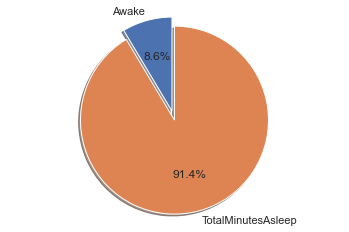

In [135]:

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Awake', 'TotalMinutesAsleep'
sizes = df_sleep['Awake'].mean(), df_sleep['TotalMinutesAsleep'].mean()
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()